<a href="https://colab.research.google.com/github/mehrdadkazemi254/Nonlinear_Optimization/blob/main/lec18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize


**Example 5, page 115**

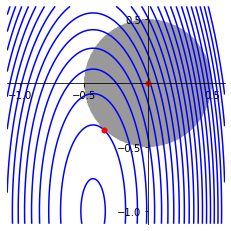

In [29]:
 f = lambda x1, x2: x1**4 + x1**2 + x2**2
 g = lambda x1, x2: [4*x1**3 +2*x1, 2*x2]
 H = lambda x1, x2: [[12*x1**2 + 2, 0],[0,2]]
 x0 = [1,1]
 f0 = f(*x0)
 g0 = np.array(g(*x0))
 H0 = np.array(H(*x0))

 #prepare data for a contour plot of phi
 d1 = np.linspace(-1.1,0.6,300)
 d2 = np.linspace(-1.1,0.6,300)
 D1,D2 = np.meshgrid(d1,d2)
 def phi(d1,d2):
   d = np.array([d1,d2])
   return f0 + g0 @ d + 0.5*d @ H0 @ d

m,n = D1.shape
Z = np.zeros((m,n))
for i in range(m):
  for j in range(n):
    Z[i,j] = phi(D1[i,j],D2[i,j])


#create the plotting area and axises
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1.1,0.6)
ax.set_ylim(-1.1,0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_yticks([-1,-0.5,0.5])
ax.set_xticks([-1,-0.5,0.5])


#two points
d0 = [0,0]
d1 = [-0.3435,-0.3658]
phi1 = phi(*d1)
ax.plot(d0[0],d0[1], 'ro', markersize=5)
ax.plot(d1[0],d1[1],'ro',markersize=5)

#contour of phi
ax.contour(D1,D2,Z,levels=[i*phi1/3 for i in range(24)], colors='blue')

#plot the disk, the feasible region of the subproblem
circle = lambda d1,d2: d1**2 +d2**2 - 0.25
CIRCLE = circle(D1,D2)
plt.imshow( (CIRCLE <= 0).astype(int),
           extent=(D1.min(),D1.max(),D2.min(),D2.max()),origin='lower', cmap='Greys', alpha=0.4)

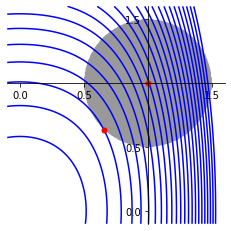

In [48]:
#visualize f
#TODO: shift the coordinates, and plot f, x0, x1, and the disk on the (x1,x2) domain

#create the plotting area and axises
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1.1+1,0.6+1)
ax.set_ylim(-1.1+1,0.6+1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data',1))
ax.spines['bottom'].set_position(('data',1))
ax.set_yticks([0,0.5,1.5])
ax.set_xticks([0,0.5,1.5])

#two points
x0 = [1,1]
xx1 = [1-0.3435,1-0.3658]
ax.plot(x0[0],x0[1], 'ro', markersize=5)
ax.plot(xx1[0],xx1[1],'ro',markersize=5)

#plot the disk, the feasible region of the subproblem in the x1,x2 domain
x1 = np.linspace(-0.1,1.6,300)
x2 = np.linspace(-0.1,1.6,300)
X1,X2 = np.meshgrid(x1,x2)
circle = lambda x1,x2: (x1-1)**2 +(x2-1)**2 - 0.25
CIRCLE = circle(X1,X2)
plt.imshow( (CIRCLE <= 0).astype(int),
           extent=(X1.min(),X1.max(),X2.min(),X2.max()),origin='lower', cmap='Greys', alpha=0.4)

#contour of f
f1 = f(*xx1)
m,n = X1.shape
Z = np.zeros((m,n))
for i in range(m):
  for j in range(n):
    Z[i,j] = f(X1[i,j],X2[i,j])
ax.contour(X1,X2,Z,levels=[i*f1/3 for i in range(24)], colors='blue')